In [50]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [44]:
white_wine = pd.read_csv('WhiteWineSampleData.csv')
white_wine.dropna()

rename_columns = {
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'chlorides': 'chlorides',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide',
    'density': 'density',
    'pH': 'pH',
    'sulphates': 'sulphates',
    'alcohol': 'alcohol'
}

white_wine = white_wine.rename(columns=rename_columns)

print(len(white_wine))

7632


In [45]:
white_wine['target'] = 0.0

white_wine['target'] = (white_wine['quality'] >= 1).astype(int)
white_wine['target'].value_counts()

0    3816
1    3816
Name: target, dtype: int64

In [46]:
Y, X = dmatrices('target ~ 0 + fixed_acidity + volatile_acidity + citric_acid'
       '+ residual_sugar + chlorides + free_sulfur_dioxide'
       '+ total_sulfur_dioxide + density + pH + sulphates+ alcohol',
                 white_wine,return_type="dataframe")

print('Design matrix X')
print(X[:5])
print('Outcomes Y')
print(Y[:5])

Design matrix X
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4    

In [47]:
y = Y['target'].values
print(y[5:])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

y_train[:5]
white_model = neighbors.KNeighborsClassifier(n_neighbors=10,
                                       weights='uniform',
                                       p=2)

white_model.fit(X_train, y_train)
X_train.iloc[0:5]
print('Predictions =', white_model.predict(X_train.iloc[0:5]))
y_train[0:5]
white_model.predict_proba(X_train.iloc[0:5])


[0. 0. 0. ... 1. 1. 1.]
Predictions = [0. 0. 0. 1. 0.]


array([[0.6, 0.4],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.4, 0.6],
       [0.8, 0.2]])

In [24]:
prediction_on_training = white_model.predict(X_train)
print("Training accuracy score: ", metrics.accuracy_score(y_train, prediction_on_training))

predicted_classes = white_model.predict(X_test)
print("Test accuracy score: ", metrics.accuracy_score(y_test, predicted_classes))

Training accuracy score:  0.8285286409584426
Test accuracy score:  0.780349344978166


In [26]:
white_model.predict_proba(X_train.iloc[0:5])
#get scores

white_model.predict(X_train.iloc[0:5])
#get classes

array([0., 0., 0., 1., 0.])

In [39]:
from sklearn import model_selection

def cv_accuracy_score(X, y, nn):
    white_model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []
    
    kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=True).split(X, y)
    for train, holdout in kfold:
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y[train]
        y_holdout = y[holdout]
        white_model.fit(X_train, y_train)
        accuracy = metrics.accuracy_score(y_holdout, white_model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = Series(accuracies).mean()
    return average_accuracy

cv_accuracy_score(X, y, nn=1)
nn = [1] + [(x + 1) * 5 for x in range(19)]
print(nn)

[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


In [40]:
scores = [cv_accuracy_score(X, y, num_nbrs) for num_nbrs in nn]

Text(0, 0.5, 'Accuracy of classifier')

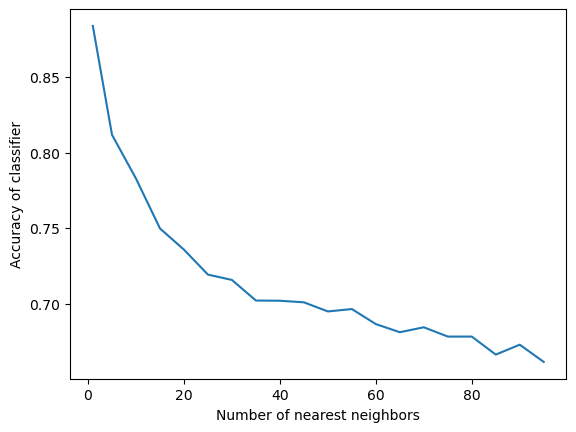

In [41]:
plot(nn, scores)
xlabel('Number of nearest neighbors')
ylabel('Accuracy of classifier')